In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read data 
- learning rate = 0.1, batch size = 16, 32, 64, 128

In [29]:
dfs_lr01 = []
for bs in ['16','32','64','128']:
    data = 'data/lr01bs' + bs + '.txt'
    df = pd.read_table(data, header=None, delim_whitespace=True,
                      names=["drop1","drop2","GIoU","Objectness","drop3","drop4","drop5","drop6","Precision","Recall",
                        "mAP@0.5","F1","val GIoU","val Objectness", "drop7"])
    dfs_lr01.append(df)

### Read data 
- learning rate = 0.01, batch size = 16, 32, 64, 128

In [30]:
dfs_lr001 = []
for bs in ['16','32','64','128']:
    data = 'data/lr001bs' + bs + '.txt'
    df = pd.read_table(data, header=None, delim_whitespace=True,
                      names=["drop1","drop2","GIoU","Objectness","drop3","drop4","drop5","drop6","Precision","Recall",
                        "mAP@0.5","F1","val GIoU","val Objectness", "drop7"])
    dfs_lr001.append(df)

### Read data 
- learning rate = 0.001, batch size = 16, 32, 64, 128

In [31]:
dfs_lr0001 = []
for bs in ['16','32','64','128']:
    data = 'data/lr0001bs' + bs + '.txt'
    df = pd.read_table(data, header=None, delim_whitespace=True,
                      names=["drop1","drop2","GIoU","Objectness","drop3","drop4","drop5","drop6","Precision","Recall",
                        "mAP@0.5","F1","val GIoU","val Objectness", "drop7"])
    dfs_lr0001.append(df)

### Read data 
- learning rate = 0.0001, batch size = 16, 32, 64, 128

In [32]:
dfs_lr00001 = []
for bs in ['16','32','64','128']:
    data = 'data/lr00001bs' + bs + '.txt'
    df = pd.read_table(data, header=None, delim_whitespace=True,
                      names=["drop1","drop2","GIoU","Objectness","drop3","drop4","drop5","drop6","Precision","Recall",
                        "mAP@0.5","F1","val GIoU","val Objectness", "drop7"])
    dfs_lr00001.append(df)

### Drop useless data

In [33]:
# Learning rate: 0.1
temp = []
for df in dfs_lr01:
    df = df.drop(["drop1","drop2","drop3","drop4","drop5","drop6","drop7"], axis=1)
    temp.append(df)
dfs_lr01 = temp

# Learning rate: 0.01
temp = []
for df in dfs_lr001:
    df = df.drop(["drop1","drop2","drop3","drop4","drop5","drop6","drop7"], axis=1)
    temp.append(df)
dfs_lr001 = temp 

# Learning rate: 0.001
temp = []
for df in dfs_lr0001:
    df = df.drop(["drop1","drop2","drop3","drop4","drop5","drop6","drop7"], axis=1)
    temp.append(df)
dfs_lr0001 = temp

# Learning rate: 0.0001
temp = []
for df in dfs_lr00001:
    df = df.drop(["drop1","drop2","drop3","drop4","drop5","drop6","drop7"], axis=1)
    temp.append(df)
dfs_lr00001 = temp

### Add columns: learning rate, batch size

In [34]:
# learning rate: 0.1
for i, df in enumerate(dfs_lr01):
    df['learning rate'] = 0.1
    df['batch size'] = 16 * (2**i)
    df['epochs'] = range(100)
    
# learning rate: 0.01
for i, df in enumerate(dfs_lr001):
    df['learning rate'] = 0.01
    df['batch size'] = 16 * (2**i)
    df['epochs'] = range(100)
    
# learning rate: 0.001
for i, df in enumerate(dfs_lr0001):
    df['learning rate'] = 0.001
    df['batch size'] = 16 * (2**i)
    df['epochs'] = range(100)
    
# learning rate: 0.0001
for i, df in enumerate(dfs_lr00001):
    df['learning rate'] = 0.0001
    df['batch size'] = 16 * (2**i)
    df['epochs'] = range(100)
dfs_lr0001[3].tail()

,GIoU,Objectness,Precision,Recall,mAP@0.5,F1,val GIoU,val Objectness,learning rate,batch size,epochs
95,1.28,1.80,0.881,0.917,0.950,0.899,1.19,1.28,0.001,128,95
96,1.27,1.83,0.880,0.918,0.950,0.898,1.19,1.28,0.001,128,96
97,1.23,1.75,0.880,0.918,0.950,0.899,1.19,1.28,0.001,128,97
98,1.27,1.82,0.880,0.919,0.950,0.899,1.18,1.28,0.001,128,98
99,1.29,1.84,0.878,0.919,0.953,0.898,1.18,1.27,0.001,128,99


### Concatenate data

In [35]:
# lr = 0.1
lr01 = pd.concat([dfs_lr01[0], dfs_lr01[1], dfs_lr01[2], dfs_lr01[3]], ignore_index=True)
# lr = 0.01
lr001 = pd.concat([dfs_lr001[0], dfs_lr001[1], dfs_lr001[2], dfs_lr001[3]], ignore_index=True)
# lr = 0.001
lr0001 = pd.concat([dfs_lr0001[0], dfs_lr0001[1], dfs_lr0001[2], dfs_lr0001[3]], ignore_index=True)
# lr = 0.0001
lr00001 = pd.concat([dfs_lr00001[0], dfs_lr00001[1], dfs_lr00001[2], dfs_lr00001[3]], ignore_index=True)

# bs = 16
bs16 = pd.concat([dfs_lr01[0], dfs_lr001[0],dfs_lr0001[0], dfs_lr00001[0]], ignore_index=True)
# bs = 32
bs32 = pd.concat([dfs_lr01[1], dfs_lr001[1],dfs_lr0001[1], dfs_lr00001[1]], ignore_index=True)
# bs = 64
bs64 = pd.concat([dfs_lr01[2], dfs_lr001[2],dfs_lr0001[2], dfs_lr00001[2]], ignore_index=True)
# bs = 128
bs128 = pd.concat([dfs_lr01[3], dfs_lr001[3],dfs_lr0001[3], dfs_lr00001[3]], ignore_index=True)

all_data = pd.concat([bs16, bs32, bs64, bs128], ignore_index=True)

In [36]:
all_data.describe()

,GIoU,Objectness,Precision,Recall,mAP@0.5,F1,val GIoU,val Objectness,learning rate,batch size,epochs
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1.464347,1.968731,0.793825,0.895983,0.870370,0.827531,1.466438,1.607029,0.027775,60.000000,49.500000
std,0.848798,1.537002,0.227684,0.146642,0.216789,0.205424,0.968700,1.390679,0.041892,42.908632,28.875095
min,0.744000,1.210000,0.015300,0.003220,0.006320,0.005840,0.636000,0.872000,0.000100,16.000000,0.000000
25%,0.893000,1.380000,0.761750,0.896750,0.897750,0.821000,0.791750,0.992000,0.000775,28.000000,24.750000
50%,1.210000,1.620000,0.913000,0.950000,0.975000,0.928000,1.110000,1.200000,0.005500,48.000000,49.500000
75%,1.720000,1.970000,0.931000,0.965000,0.985000,0.947000,1.755000,1.540000,0.032500,80.000000,74.250000
max,6.360000,20.700000,0.948000,0.977000,0.989000,0.955000,5.790000,14.600000,0.100000,128.000000,99.000000


### Data processing
- Precision

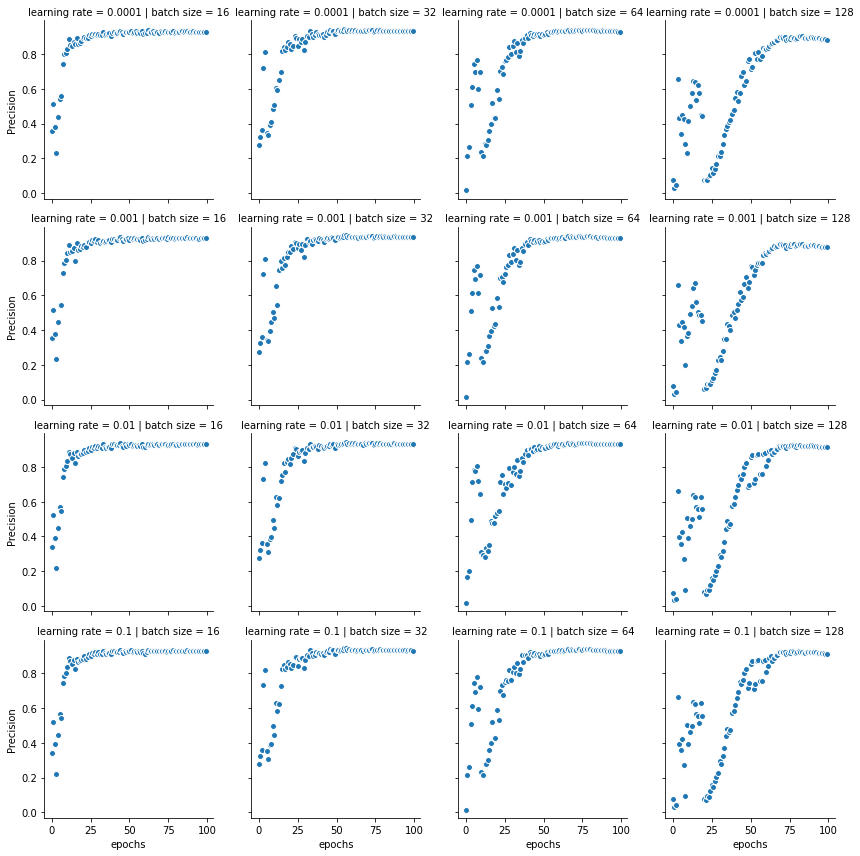

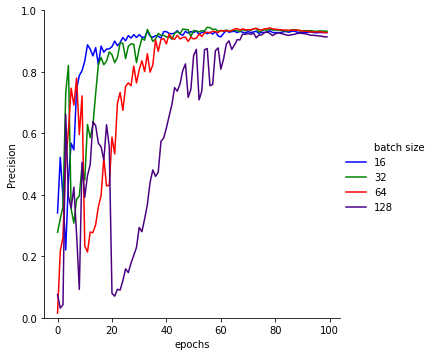

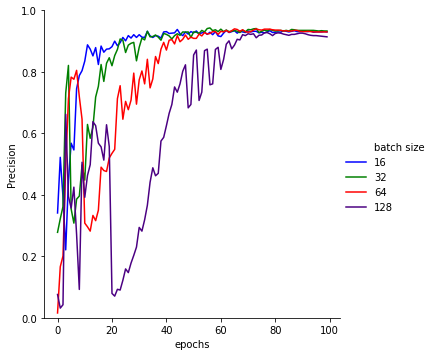

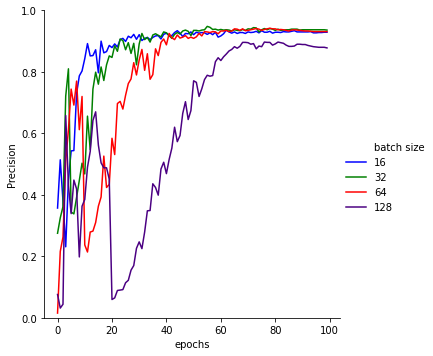

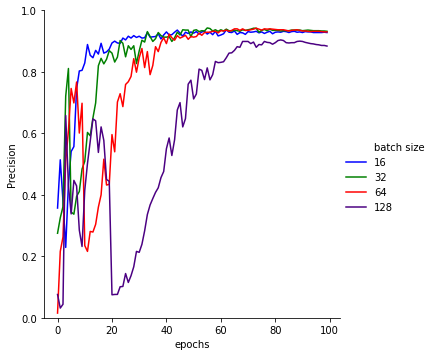

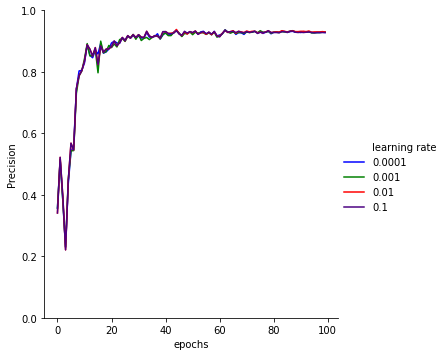

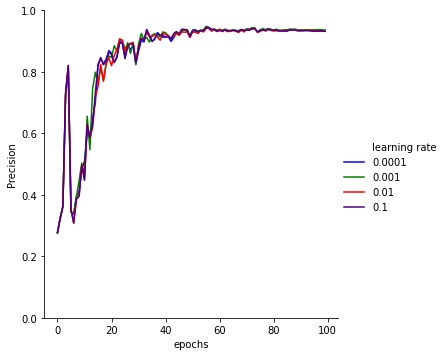

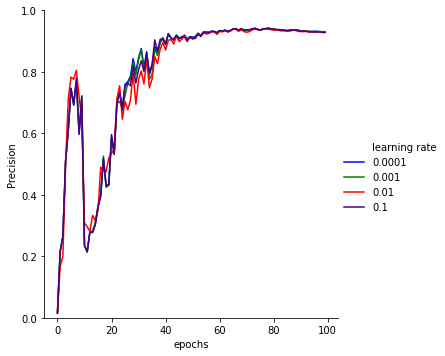

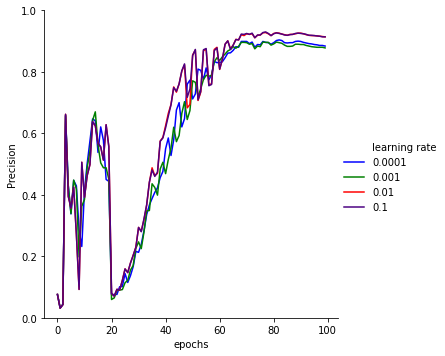

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.FacetGrid(all_data, col="batch size", row="learning rate")
g = g.map(plt.scatter, "epochs", "Precision", edgecolor='w')
g.savefig("Precision.png")

Precision_epochs_lr01 = sns.relplot(x='epochs',y='Precision',hue="batch size", kind='line', data=lr01, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Precision_epochs_lr01.savefig("Precision_epochs_lr01.png", dpi=300)

Precision_epochs_lr001 = sns.relplot(x='epochs',y='Precision',hue="batch size", kind='line', data=lr001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Precision_epochs_lr001.savefig("Precision_epochs_lr001.png", dpi=300)

Precision_epochs_lr0001 = sns.relplot(x='epochs',y='Precision',hue="batch size", kind='line', data=lr0001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Precision_epochs_lr0001.savefig("Precision_epochs_lr0001.png", dpi=300)

Precision_epochs_lr00001 = sns.relplot(x='epochs',y='Precision',hue="batch size", kind='line', data=lr00001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Precision_epochs_lr00001.savefig("Precision_epochs_lr00001.png", dpi=300)

Precision_epochs_bs16 = sns.relplot(x='epochs',y='Precision',hue="learning rate", kind='line', data=bs16, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Precision_epochs_bs16.savefig("Precision_epochs_bs16.png", dpi=300)

Precision_epochs_bs32 = sns.relplot(x='epochs',y='Precision',hue="learning rate", kind='line', data=bs32, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Precision_epochs_bs32.savefig("Precision_epochs_bs32.png", dpi=300)

Precision_epochs_bs64 = sns.relplot(x='epochs',y='Precision',hue="learning rate", kind='line', data=bs64, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Precision_epochs_bs64.savefig("Precision_epochs_bs64.png", dpi=300)

Precision_epochs_bs128 = sns.relplot(x='epochs',y='Precision',hue="learning rate", kind='line', data=bs128, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Precision_epochs_bs128.savefig("Precision_epochs_bs128.png", dpi=300)

### Data processing
- mAP@0.5

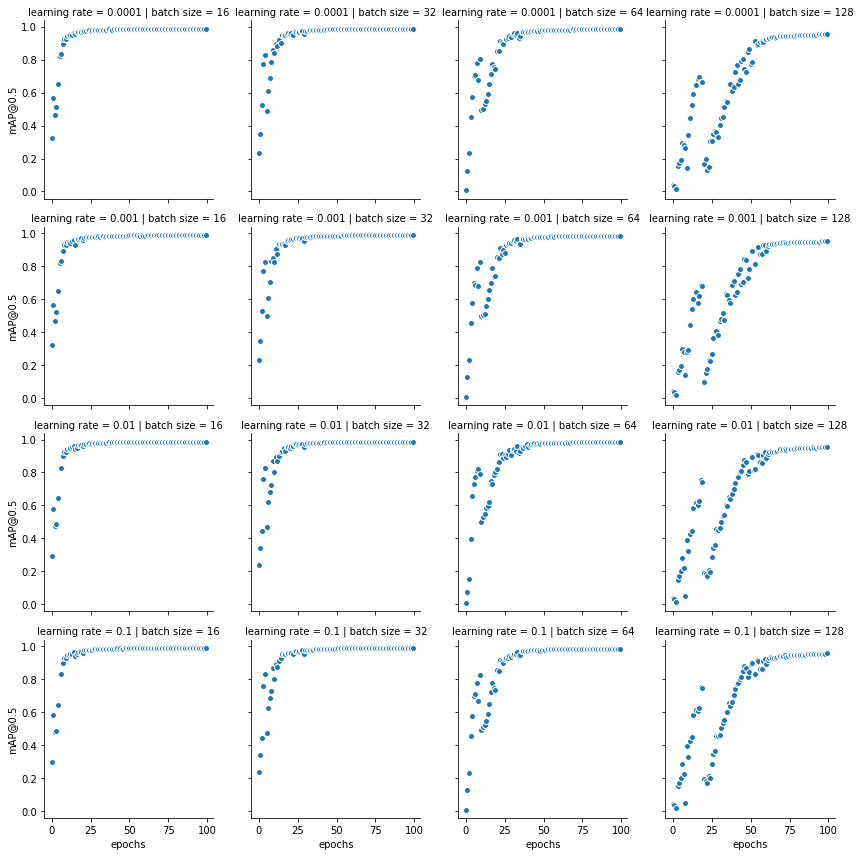

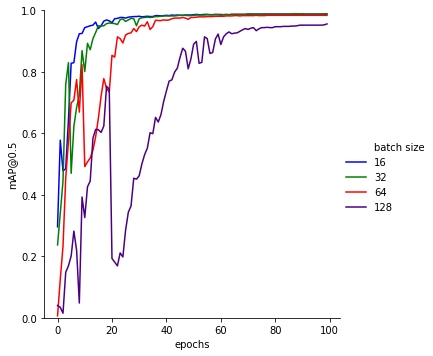

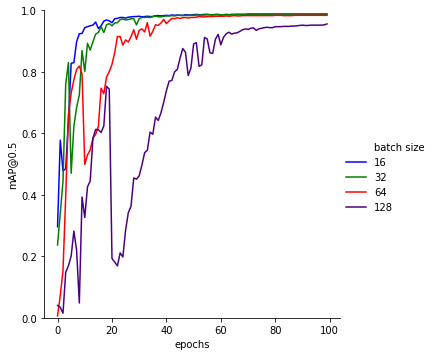

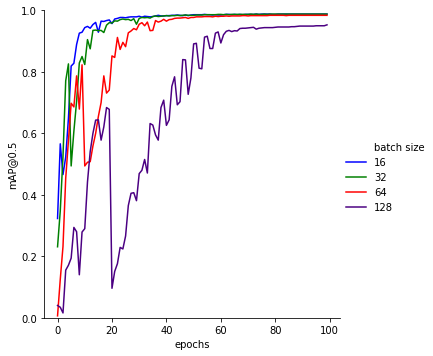

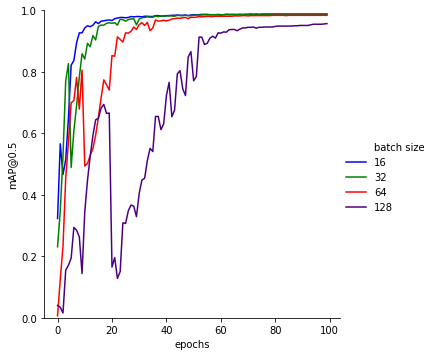

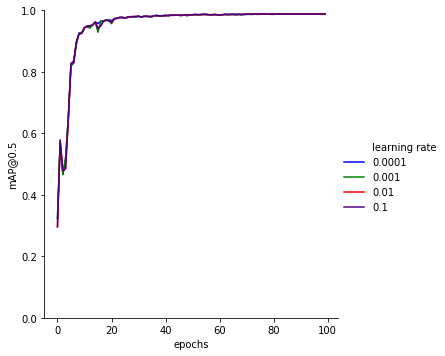

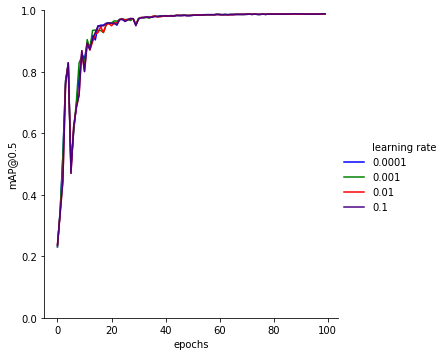

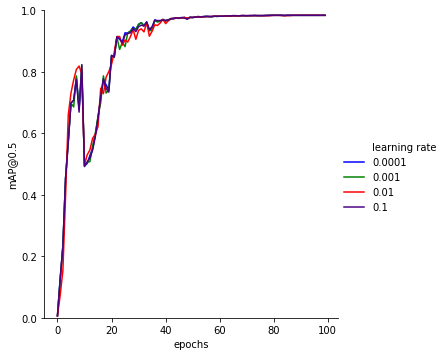

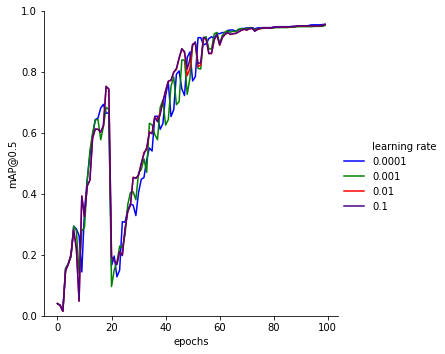

In [38]:
g = sns.FacetGrid(all_data, col="batch size", row="learning rate")
g = g.map(plt.scatter, "epochs", "mAP@0.5", edgecolor='w')
g.savefig("mAP05.png")

mAP05_epochs_lr01 = sns.relplot(x='epochs',y='mAP@0.5',hue="batch size", kind='line', data=lr01, palette=['b','g','r','indigo'])
plt.ylim(0,1)
mAP05_epochs_lr01.savefig("mAP@0.5_epochs_lr01.png", dpi=300)

mAP05_epochs_lr001 = sns.relplot(x='epochs',y='mAP@0.5',hue="batch size", kind='line', data=lr001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
mAP05_epochs_lr001.savefig("mAP@0.5_epochs_lr001.png", dpi=300)

mAP05_epochs_lr0001 = sns.relplot(x='epochs',y='mAP@0.5',hue="batch size", kind='line', data=lr0001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
mAP05_epochs_lr0001.savefig("mAP@0.5_epochs_lr0001.png", dpi=300)

mAP05_epochs_lr00001 = sns.relplot(x='epochs',y='mAP@0.5',hue="batch size", kind='line', data=lr00001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
mAP05_epochs_lr00001.savefig("mAP@0.5_epochs_lr00001.png", dpi=300)

mAP05_epochs_bs16 = sns.relplot(x='epochs',y='mAP@0.5',hue="learning rate", kind='line', data=bs16, palette=['b','g','r','indigo'])
plt.ylim(0,1)
mAP05_epochs_bs16.savefig("mAP@0.5_epochs_bs16.png", dpi=300)

mAP05_epochs_bs32 = sns.relplot(x='epochs',y='mAP@0.5',hue="learning rate", kind='line', data=bs32, palette=['b','g','r','indigo'])
plt.ylim(0,1)
mAP05_epochs_bs32.savefig("mAP@0.5_epochs_bs32.png", dpi=300)

mAP05_epochs_bs64 = sns.relplot(x='epochs',y='mAP@0.5',hue="learning rate", kind='line', data=bs64, palette=['b','g','r','indigo'])
plt.ylim(0,1)
mAP05_epochs_bs64.savefig("mAP@0.5_epochs_bs64.png", dpi=300)

mAP05_epochs_bs128 = sns.relplot(x='epochs',y='mAP@0.5',hue="learning rate", kind='line', data=bs128, palette=['b','g','r','indigo'])
plt.ylim(0,1)
mAP05_epochs_bs128.savefig("mAP@0.5_epochs_bs128.png", dpi=300)

### Data processing
- Recall

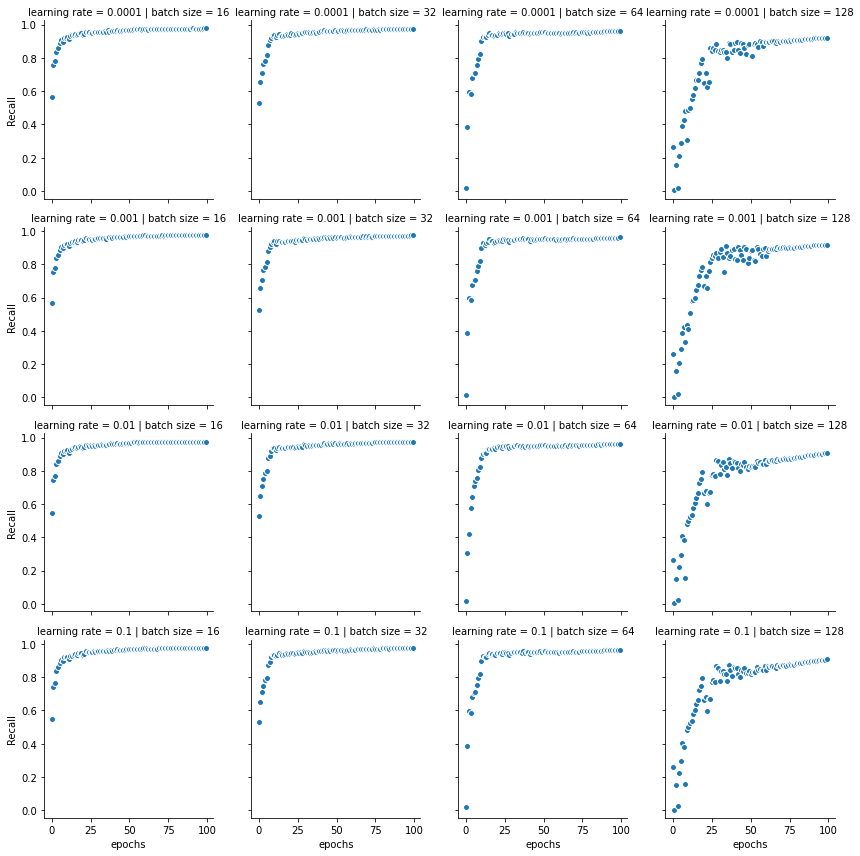

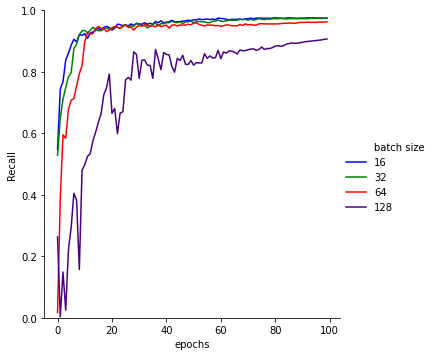

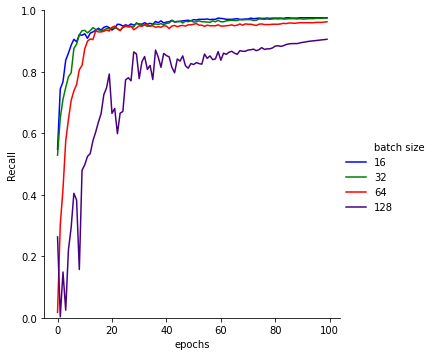

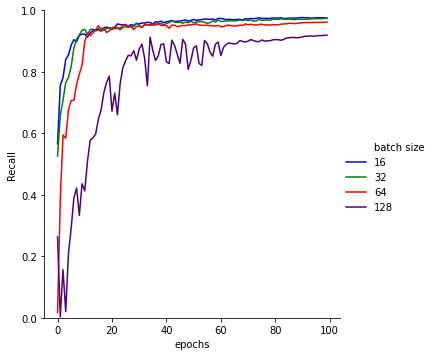

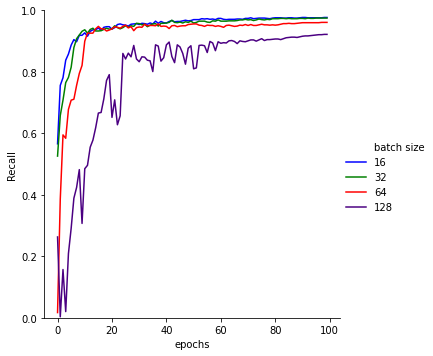

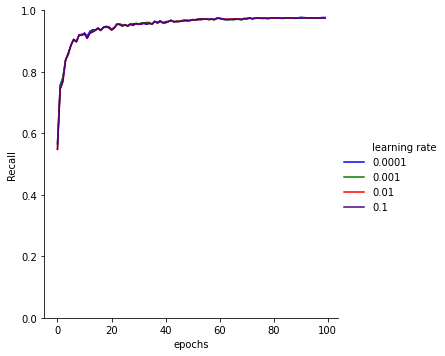

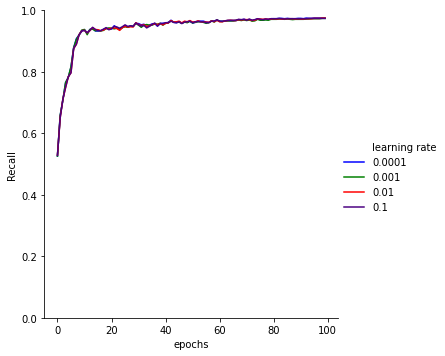

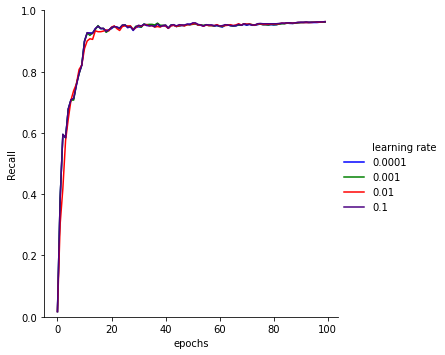

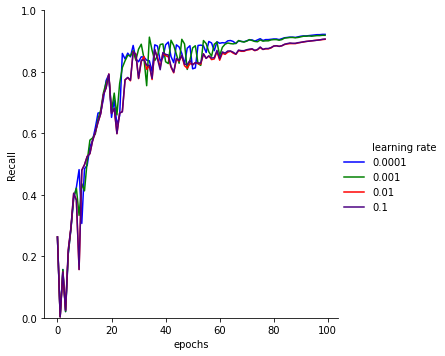

In [39]:
g = sns.FacetGrid(all_data, col="batch size", row="learning rate")
g = g.map(plt.scatter, "epochs", "Recall", edgecolor='w')
g.savefig("Recall.png")

Recall_epochs_lr01 = sns.relplot(x='epochs',y='Recall',hue="batch size", kind='line', data=lr01, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Recall_epochs_lr01.savefig("Recall_epochs_lr01.png", dpi=300)

Recall_epochs_lr001 = sns.relplot(x='epochs',y='Recall',hue="batch size", kind='line', data=lr001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Recall_epochs_lr001.savefig("Recall_epochs_lr001.png", dpi=300)

Recall_epochs_lr0001 = sns.relplot(x='epochs',y='Recall',hue="batch size", kind='line', data=lr0001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Recall_epochs_lr0001.savefig("Recall_epochs_lr0001.png", dpi=300)

Recall_epochs_lr00001 = sns.relplot(x='epochs',y='Recall',hue="batch size", kind='line', data=lr00001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Recall_epochs_lr00001.savefig("Recall_epochs_lr00001.png", dpi=300)

Recall_epochs_bs16 = sns.relplot(x='epochs',y='Recall',hue="learning rate", kind='line', data=bs16, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Recall_epochs_bs16.savefig("Recall_epochs_bs16.png", dpi=300)

Recall_epochs_bs32 = sns.relplot(x='epochs',y='Recall',hue="learning rate", kind='line', data=bs32, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Recall_epochs_bs32.savefig("Recall_epochs_bs32.png", dpi=300)

Recall_epochs_bs64 = sns.relplot(x='epochs',y='Recall',hue="learning rate", kind='line', data=bs64, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Recall_epochs_bs64.savefig("Recall_epochs_bs64.png", dpi=300)

Recall_epochs_bs128 = sns.relplot(x='epochs',y='Recall',hue="learning rate", kind='line', data=bs128, palette=['b','g','r','indigo'])
plt.ylim(0,1)
Recall_epochs_bs128.savefig("Recall_epochs_bs128.png", dpi=300)

### Data processing
- GIoU

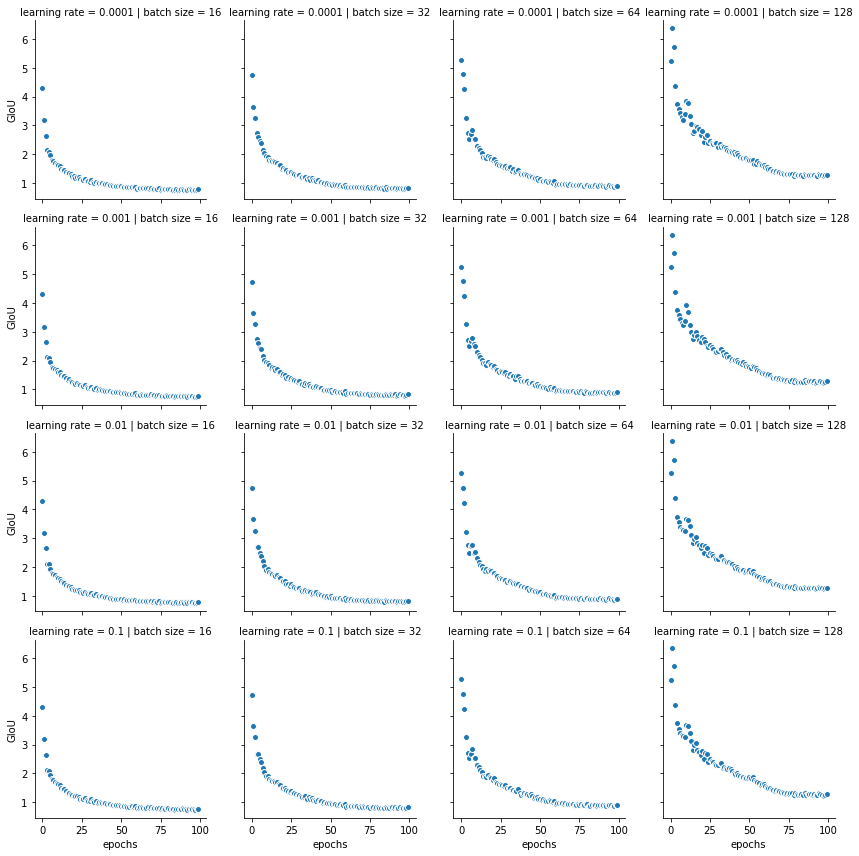

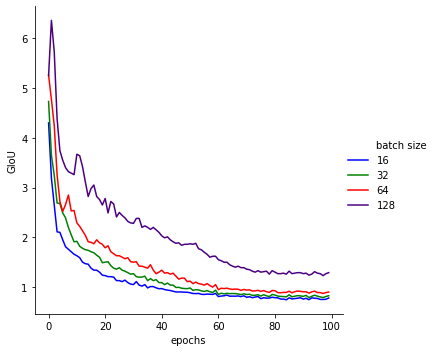

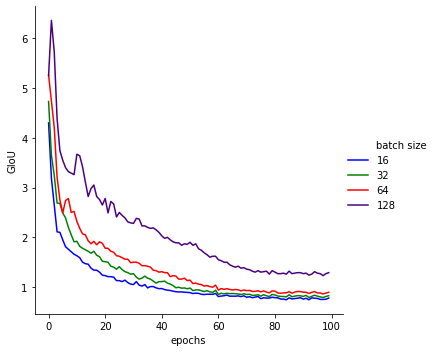

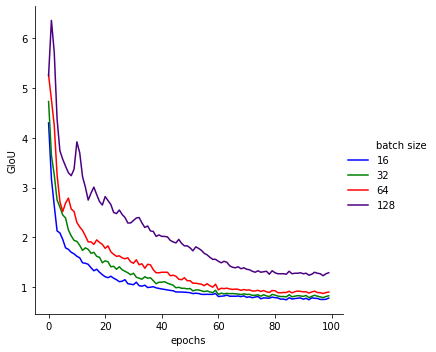

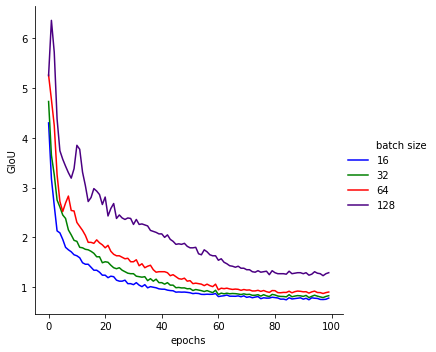

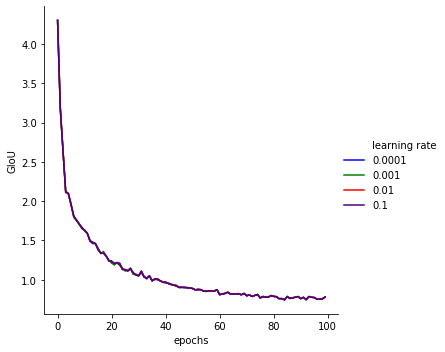

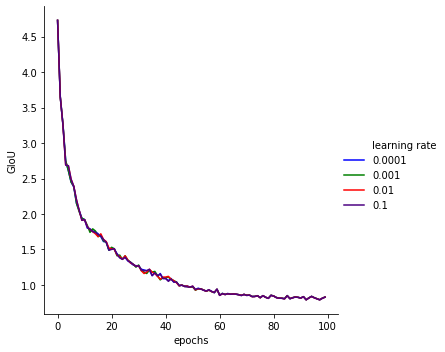

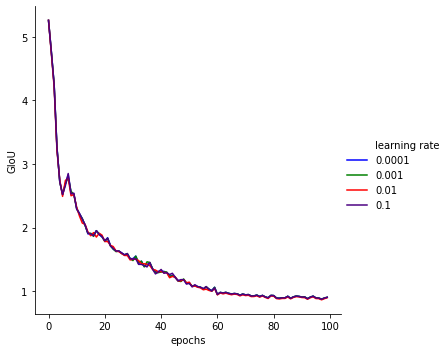

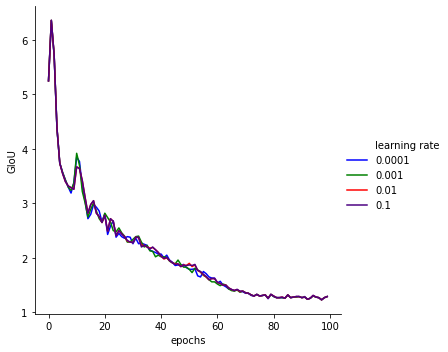

In [40]:
g = sns.FacetGrid(all_data, col="batch size", row="learning rate")
g = g.map(plt.scatter, "epochs", "GIoU", edgecolor='w')
g.savefig("GIoU.png")

GIoU_epochs_lr01 = sns.relplot(x='epochs',y='GIoU',hue="batch size", kind='line', data=lr01, palette=['b','g','r','indigo'])
GIoU_epochs_lr01.savefig("GIoU_epochs_lr01.png", dpi=300)

GIoU_epochs_lr001 = sns.relplot(x='epochs',y='GIoU',hue="batch size", kind='line', data=lr001, palette=['b','g','r','indigo'])
GIoU_epochs_lr001.savefig("GIoU_epochs_lr001.png", dpi=300)

GIoU_epochs_lr0001 = sns.relplot(x='epochs',y='GIoU',hue="batch size", kind='line', data=lr0001, palette=['b','g','r','indigo'])
GIoU_epochs_lr0001.savefig("GIoU_epochs_lr0001.png", dpi=300)

GIoU_epochs_lr00001 = sns.relplot(x='epochs',y='GIoU',hue="batch size", kind='line', data=lr00001, palette=['b','g','r','indigo'])
GIoU_epochs_lr00001.savefig("GIoU_epochs_lr00001.png", dpi=300)

GIoU_epochs_bs16 = sns.relplot(x='epochs',y='GIoU',hue="learning rate", kind='line', data=bs16, palette=['b','g','r','indigo'])
GIoU_epochs_bs16.savefig("GIoU_epochs_bs16.png", dpi=300)

GIoU_epochs_bs32 = sns.relplot(x='epochs',y='GIoU',hue="learning rate", kind='line', data=bs32, palette=['b','g','r','indigo'])
GIoU_epochs_bs32.savefig("GIoU_epochs_bs32.png", dpi=300)

GIoU_epochs_bs64 = sns.relplot(x='epochs',y='GIoU',hue="learning rate", kind='line', data=bs64, palette=['b','g','r','indigo'])
GIoU_epochs_bs64.savefig("GIoU_epochs_bs64.png", dpi=300)

GIoU_epochs_bs128 = sns.relplot(x='epochs',y='GIoU',hue="learning rate", kind='line', data=bs128, palette=['b','g','r','indigo'])
GIoU_epochs_bs128.savefig("GIoU_epochs_bs128.png", dpi=300)

### Data processing
- F1 Score

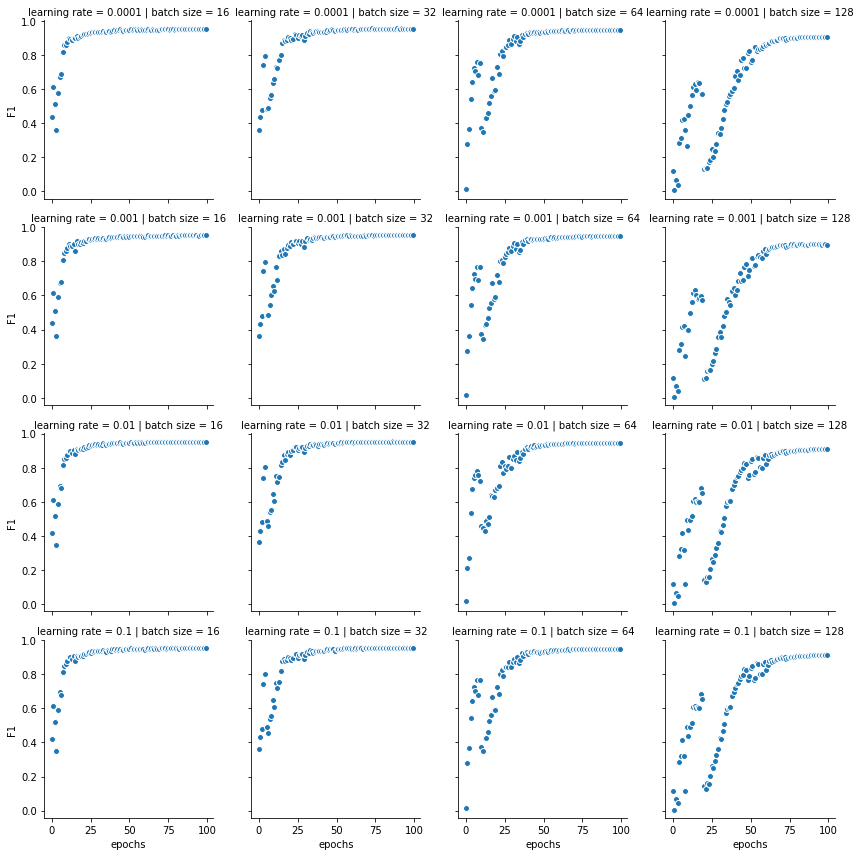

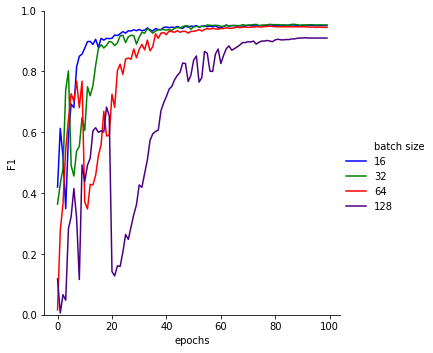

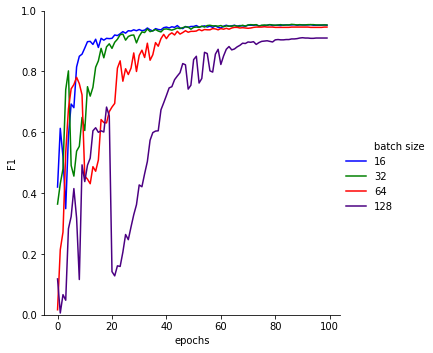

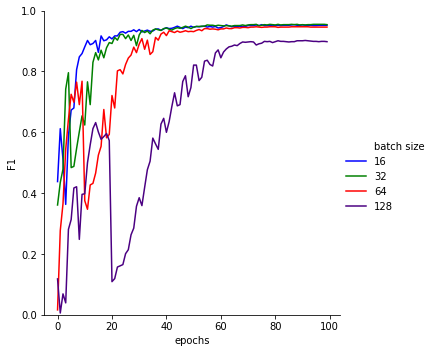

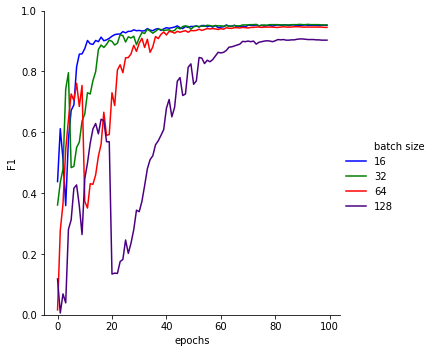

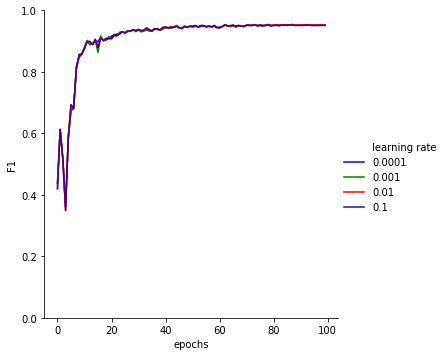

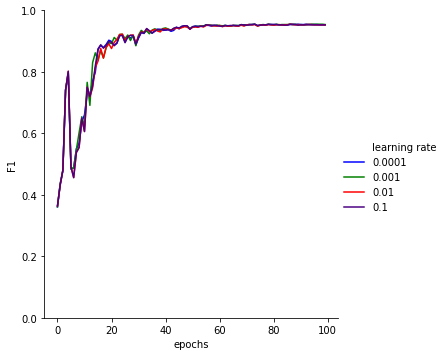

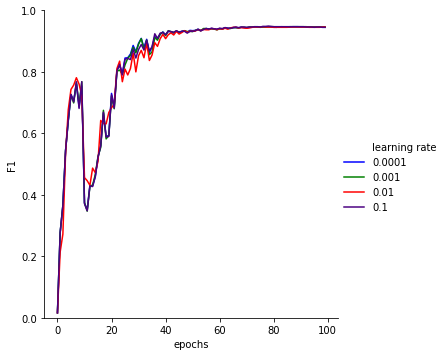

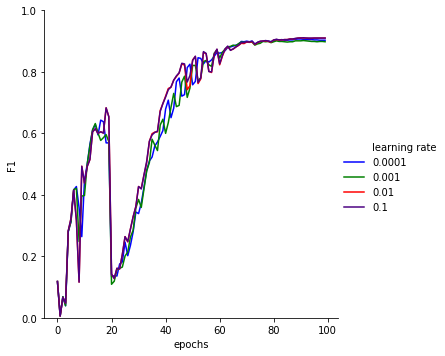

In [41]:
g = sns.FacetGrid(all_data, col="batch size", row="learning rate")
g = g.map(plt.scatter, "epochs", "F1", edgecolor='w')
g.savefig("F1.png")

F1_epochs_lr01 = sns.relplot(x='epochs',y='F1',hue="batch size", kind='line', data=lr01, palette=['b','g','r','indigo'])
plt.ylim(0,1)
F1_epochs_lr01.savefig("F1_epochs_lr01.png", dpi=300)

F1_epochs_lr001 = sns.relplot(x='epochs',y='F1',hue="batch size", kind='line', data=lr001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
F1_epochs_lr001.savefig("F1_epochs_lr001.png", dpi=300)

F1_epochs_lr0001 = sns.relplot(x='epochs',y='F1',hue="batch size", kind='line', data=lr0001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
F1_epochs_lr0001.savefig("F1_epochs_lr0001.png", dpi=300)

F1_epochs_lr00001 = sns.relplot(x='epochs',y='F1',hue="batch size", kind='line', data=lr00001, palette=['b','g','r','indigo'])
plt.ylim(0,1)
F1_epochs_lr00001.savefig("F1_epochs_lr00001.png", dpi=300)

F1_epochs_bs16 = sns.relplot(x='epochs',y='F1',hue="learning rate", kind='line', data=bs16, palette=['b','g','r','indigo'])
plt.ylim(0,1)
F1_epochs_bs16.savefig("F1_epochs_bs16.png", dpi=300)

F1_epochs_bs32 = sns.relplot(x='epochs',y='F1',hue="learning rate", kind='line', data=bs32, palette=['b','g','r','indigo'])
plt.ylim(0,1)
F1_epochs_bs32.savefig("F1_epochs_bs32.png", dpi=300)

F1_epochs_bs64 = sns.relplot(x='epochs',y='F1',hue="learning rate", kind='line', data=bs64, palette=['b','g','r','indigo'])
plt.ylim(0,1)
F1_epochs_bs64.savefig("F1_epochs_bs64.png", dpi=300)

F1_epochs_bs128 = sns.relplot(x='epochs',y='F1',hue="learning rate", kind='line', data=bs128, palette=['b','g','r','indigo'])
plt.ylim(0,1)
F1_epochs_bs128.savefig("F1_epochs_bs128.png", dpi=300)

In [42]:
running_time = pd.read_table('data/runningtime.txt', delim_whitespace=True)
running_time

,learningRate,batchSize,runningTime(h)
0,0.1000,16,1.693
1,0.1000,32,1.682
2,0.1000,64,1.485
3,0.1000,128,1.974
4,0.0100,16,1.655
5,0.0100,32,1.641
6,0.0100,64,1.774
7,0.0100,128,1.988
8,0.0010,16,1.478
9,0.0010,32,1.488


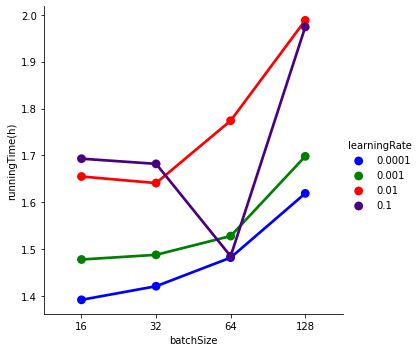

In [43]:
batchSize_runningTime = sns.catplot(x='batchSize',y='runningTime(h)',hue="learningRate", kind='point', data=running_time, palette=['b','g','r','indigo'])
batchSize_runningTime.savefig("batchSize_runningTime.png", dpi=300)